In [15]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import matplotlib


%matplotlib inline

model = YOLO("/home/sonymd/Desktop/YOLO8/runs/detect/train/weights/best.pt")


output = model(['/home/sonymd/Desktop/YOLO8/NIH-CXR-MSUFAL/test/images/1305_AM_Chest_AP8.png',
             '/home/sonymd/Desktop/YOLO8/NIH-CXR-MSUFAL/test/images/1296_AM_Chest_AP24.png',
             '/home/sonymd/Desktop/YOLO8/NIH-CXR-MSUFAL/test/images/1354_PM_Chest_AP1.png',
             '/home/sonymd/Desktop/YOLO8/NIH-CXR-MSUFAL/test/images/339_AM_Chest_AP12.png'])





# Extract the bounding box coordinates and class labels

def load_annotations(annot_path):
    with open(annot_path, 'r') as f:
        lines = f.readlines()
        boxes = [list(map(float, line.strip().split())) for line in lines]
    return boxes


def load_gt_box(boxes, width, height, class_id):
    # extract the box with class label class
    idx = [box[0] for box in boxes].index(class_id)

    # convert yolo format to x1, y1, x2, y2
    xmin = int((boxes[idx][1] - boxes[idx][3] / 2) * width)
    ymin = int((boxes[idx][2] - boxes[idx][4] / 2) * height)
    xmax = int((boxes[idx][1] + boxes[idx][3] / 2) * width)
    ymax = int((boxes[idx][2] + boxes[idx][4] / 2) * height)

    return xmin, ymin, xmax, ymax


def display_prediction(out, plot_gt = False):
    thickness = 10
    cvColorGreen = (0, 255, 0)
    cvColorRed = (255, 0, 0)

    predicted_classes = out.boxes.cls.cpu().numpy().tolist()
    predicted_boxes = out.boxes.xyxy.cpu().numpy()
    predicted_scores = out.boxes.conf.cpu().numpy()
    original_image = out.orig_img
    img_path = out.path
    
    
    annot_path = img_path.replace('images', 'labels').replace('.png', '.txt')
    boxes = load_annotations(annot_path)
    width, height = out.orig_img.shape[1], out.orig_img.shape[0]


    plt.figure(figsize=(10, 8), dpi=100)

    plt.subplot(2, 2, 1)
    plt.imshow(original_image)

    # Show the predicted bounding box T1-T5
    plt.subplot(2, 2, 2)
    # plot the ground truth box
    img = original_image.copy()
    
    if plot_gt:
        xmin, ymin, xmax, ymax = load_gt_box(boxes, width, height, 0)
        img = cv2.rectangle(img, (xmin, ymin),
                            (xmax, ymax), cvColorGreen, thickness)

    # Plot the predicted box
    idx = predicted_classes.index(0)
    xmin, ymin, xmax, ymax = map(int, predicted_boxes[idx])
    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), cvColorRed, thickness)
    plt.imshow(img)
    plt.title(out.names[0] + f": {predicted_scores[idx]:.4f}")


    # Show the Clavicle Only
    plt.subplot(2, 2, 3)
    # plot the ground truth box
    img = original_image.copy()
    if plot_gt:
        xmin, ymin, xmax, ymax = load_gt_box(boxes, width, height, 1)
        img = cv2.rectangle(img, (xmin, ymin),
                            (xmax, ymax), (0, 255, 0), thickness)

    # Plot the predicted box
    idx = predicted_classes.index(1)
    xmin, ymin, xmax, ymax = map(int, predicted_boxes[idx])
    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), thickness)
    plt.imshow(img)
    plt.title(out.names[1] + f": {predicted_scores[idx]:.4f}")


    # Show the Complete Vertebrae
    plt.subplot(2, 2, 4)
    # plot the ground truth box
    img = original_image.copy()
    if plot_gt:
        xmin, ymin, xmax, ymax = load_gt_box(boxes, width, height, 2)
        img = cv2.rectangle(img, (xmin, ymin),
                            (xmax, ymax), (0, 255, 0), thickness)

    # Plot the predicted box
    idx = predicted_classes.index(2)
    xmin, ymin, xmax, ymax = map(int, predicted_boxes[idx])
    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), thickness)
    plt.imshow(img)
    plt.title(out.names[2] + f": {predicted_scores[idx]:.4f}")
    plt.show()




0: 640x640 1 T1-T5, 1 Complete-Vertebrae, 1 Clavicle-Only, 1: 640x640 1 T1-T5, 1 Complete-Vertebrae, 1 Clavicle-Only, 2: 640x640 1 T1-T5, 1 Complete-Vertebrae, 1 Clavicle-Only, 3: 640x640 1 T1-T5, 1 Complete-Vertebrae, 1 Clavicle-Only, 4.1ms
Speed: 1.2ms preprocess, 1.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


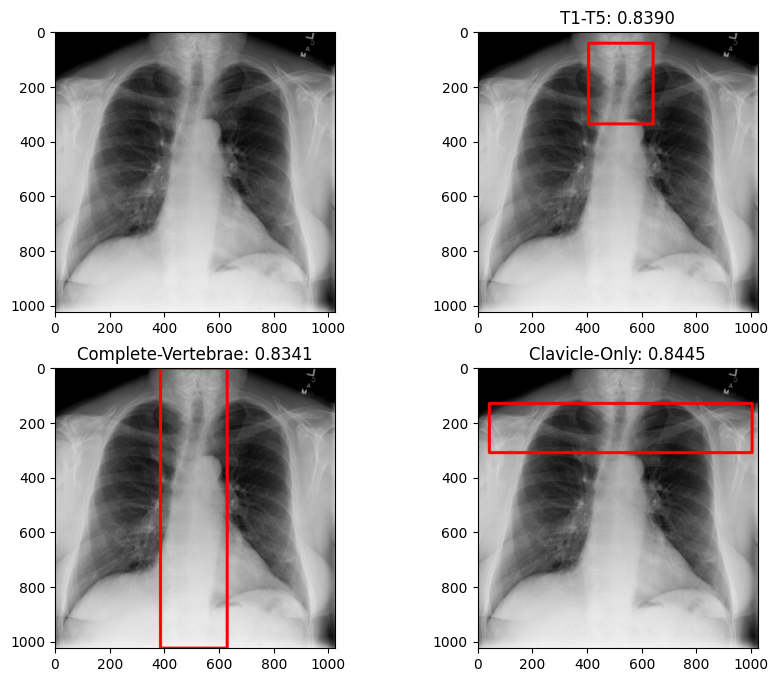

In [16]:
display_prediction(output[3], plot_gt=False)